In [2]:
# Gute Fragestellung für datascience Projekt (Sportify)
# Gibt es einen Zusammenhang zwischen eigenen Musikgeschmack und der Geschmack der anderen?

# Importieren der benötigten Bibliotheken
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials


In [3]:
CLIENT_ID = "082b3dd7a97642d49b60a647673caa75"
CLIENT_SECRET = "276e4715f8a14a34a7622c0105a8588c"
USERSANGEETHS = "qme120m1x3bg2wrtw3haiiyrb"
USERSTIAFEN = "stiafen"

client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [4]:
# get all playlists of a user
def get_playlists(user):
    playlists = sp.user_playlists(user)
    playlist_ids = []
    while playlists:
        for i, playlist in enumerate(playlists['items']):
            playlist_ids.append(playlist['id'])
        if playlists['next']:
            playlists = sp.next(playlists)
        else:
            playlists = None
    return playlist_ids

In [5]:
playlistsSangeeths = get_playlists(USERSANGEETHS)
playlistsTiafen = get_playlists(USERSTIAFEN)

# get the name of the playlists
def get_playlist_name(user, playlist_id):
    playlist = sp.user_playlist(user, playlist_id)
    return playlist['name'], playlist['id']

for playlist in playlistsSangeeths:
    print(get_playlist_name(USERSANGEETHS, playlist))

for playlist in playlistsTiafen:
    print(get_playlist_name(USERSTIAFEN, playlist))

('Fav Songs Sangeeths', '2E7GAf1h3F19ezc18w1NpZ')
('Tamil Vibes', '64Lq6W07GIOs087K88iOzT')
('Arabic  Vibes', '1Rr83zHLDULxQDbC9taydm')
('Albanien Vibes', '6jyy1HUool6rj0xWLVsAPC')
('UK DRILL ', '5ycwKESGY1Z71ftYWmTVJs')
('Baba Vibes', '67a5HCEjwm4aXvjPVoxoAX')
('Favorite Songs', '4DeCJm3aeeb0TTdthf8MGY')
('Caterpillar (feat. Eminem & King Green)', '1JKSl9B6hJNCGFs9FdOq8I')
('Meine Playlist Nr.\xa034', '3uBDJVShkGJKFxPNnjC7IL')
('Dein Mixtape\xa06 - ZUSAMMENGESTELLT FÜR STIAFEN:21.06.19', '48I13UCIzloZpyRE23zwIa')
('Mixtape 3', '2jnqcj5CxaBLHjzVafdmce')
('Oldschool', '4RjDNPzba04zlAan0a4bTE')


In [9]:
favoritplaylistSangeeths = "64Lq6W07GIOs087K88iOzT"
favoritplaylistStiafen = "4DeCJm3aeeb0TTdthf8MGY"

# save all tracks in csv file
def get_playlist_tracks(user, playlist_id):
    results = sp.user_playlist_tracks(user, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

tracksSangeeths = get_playlist_tracks(USERSANGEETHS, favoritplaylistSangeeths)
tracksSangeeths = pd.DataFrame(tracksSangeeths)
tracksSangeeths

# just put colomn track in a new dataframe
tracksSangeeths = tracksSangeeths['track']
tracksSangeeths

# get all the info in colomn track
tracksSangeeths = tracksSangeeths.apply(pd.Series)
tracksSangeeths

tracksStiafen = get_playlist_tracks(USERSTIAFEN, favoritplaylistStiafen)
tracksStiafen = pd.DataFrame(tracksStiafen)

# just put colomn track in a new dataframe
tracksStiafen = tracksStiafen['track']

# get all the info in colomn track
tracksStiafen = tracksStiafen.apply(pd.Series)

#Get Audio features for all tracks in favorite Playlist
#features = []
#for uri in tracksStiafen['uri']:
#   features = features+sp.audio_features(uri)
#audioFeaturesStiafen = pd.DataFrame(features)
#audioFeaturesStiafen['user'] = "Stiafen"

#Daten lokal im csv zwischenspeichern da jeweiliges Abfragen mehrere Minuten braucht
#audioFeaturesStiafen.to_csv('audiofeatures_stiafen')
audioFeaturesStiafenRaw = pd.read_csv('audiofeatures_stiafen')
audioFeaturesStiafen = pd.DataFrame(audioFeaturesStiafenRaw)

##Da Stiafen über 2000 Datenpunkte hat und dadurch eine nicht klare Visualisierung möglich, müssen wir für die Visualisierung samples nehmen
audioFeaturesStiafenSample = audioFeaturesStiafen.sample(200)


features = []
for uri in tracksSangeeths['uri']:
    features = features+sp.audio_features(uri)
audioFeaturesSangeeths = pd.DataFrame(features)
audioFeaturesSangeeths['user'] = "Sangeeths"
audioFeaturesSangeeths

#Dieser Dataframe wird nur zur Visualisierung genutzt, da von Stiafens Datensatz nur Samples genommen wurden (200)
completeAudioDataFrameVisualize = audioFeaturesSangeeths.append(audioFeaturesStiafenSample)


C:\Users\Startklar\AppData\Local\Temp\ipykernel_12660\768144912.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  completeAudioDataFrameVisualize = audioFeaturesSangeeths.append(audioFeaturesStiafenSample)


In [7]:
tracksSangeeths

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,293546,False,False,{'isrc': 'INT202203051'},{'spotify': 'https://open.spotify.com/track/1N...,https://api.spotify.com/v1/tracks/1NoaJoxPKQr9...,1NoaJoxPKQr9XNLOuKTyNV,False,"Kaalathukkum Nee Venum - From ""Vendhu Thanindh...",61,https://p.scdn.co/mp3-preview/5d9a0a353a623e18...,True,1,track,spotify:track:1NoaJoxPKQr9XNLOuKTyNV
1,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,243570,False,False,{'isrc': 'INS172200001'},{'spotify': 'https://open.spotify.com/track/1U...,https://api.spotify.com/v1/tracks/1UUgngRGzFWf...,1UUgngRGzFWfgpyN0WAN1r,False,"Naan Pizhai (From ""Kaathuvaakula Rendu Kaadhal"")",67,https://p.scdn.co/mp3-preview/11ce5ab315dc3143...,True,1,track,spotify:track:1UUgngRGzFWfgpyN0WAN1r
2,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,297389,False,False,{'isrc': 'INS172200431'},{'spotify': 'https://open.spotify.com/track/5J...,https://api.spotify.com/v1/tracks/5JC1RPGBMSiK...,5JC1RPGBMSiKlA3gniEmCW,False,"Thozhi (From ""Hey Sinamika"")",56,https://p.scdn.co/mp3-preview/0a0292171e349c5c...,True,1,track,spotify:track:5JC1RPGBMSiKlA3gniEmCW
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,332702,False,False,{'isrc': 'INS172002791'},{'spotify': 'https://open.spotify.com/track/4o...,https://api.spotify.com/v1/tracks/4oNVmnywnXgu...,4oNVmnywnXguyk76wkMuIb,False,Mudhal Nee Mudivum Nee Title Track,66,https://p.scdn.co/mp3-preview/16c44c71f8228a1e...,True,2,track,spotify:track:4oNVmnywnXguyk76wkMuIb
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,294135,False,False,{'isrc': 'TCAGB2205684'},{'spotify': 'https://open.spotify.com/track/24...,https://api.spotify.com/v1/tracks/24OmFcucllce...,24OmFcucllcefrg0pPOuCb,False,"Parandhu Pogindren (From ""Kuthiraivaal"")",41,https://p.scdn.co/mp3-preview/d15f1a449bca1905...,True,1,track,spotify:track:24OmFcucllcefrg0pPOuCb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,202529,False,False,{'isrc': 'INH100507991'},{'spotify': 'https://open.spotify.com/track/4H...,https://api.spotify.com/v1/tracks/4He8tSvVBkdu...,4He8tSvVBkduCFB2zq2O1G,False,Ganapathiye Varuvaai,29,https://p.scdn.co/mp3-preview/edd6265370c1d039...,True,2,track,spotify:track:4He8tSvVBkduCFB2zq2O1G
98,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,275946,False,False,{'isrc': 'INN130501489'},{'spotify': 'https://open.spotify.com/track/68...,https://api.spotify.com/v1/tracks/68vNIjPP4qek...,68vNIjPP4qeksAQI6wrCHy,False,Gnana Vinayagane,0,https://p.scdn.co/mp3-preview/a1b347f20ccbd99b...,True,3,track,spotify:track:68vNIjPP4qeksAQI6wrCHy
99,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,208695,False,False,{'isrc': 'INT201902048'},{'spotify': 'https://open.spotify.com/track/1V...,https://api.spotify.com/v1/tracks/1VMXz8WddV7A...,1VMXz8WddV7AUkUOY2Q90z,False,Aazhi Soozhndha,57,https://p.scdn.co/mp3-preview/3eead6b5892060a3...,True,5,track,spotify:track:1VMXz8WddV7AUkUOY2Q90z

<AxesSubplot:xlabel='energy', ylabel='danceability'>

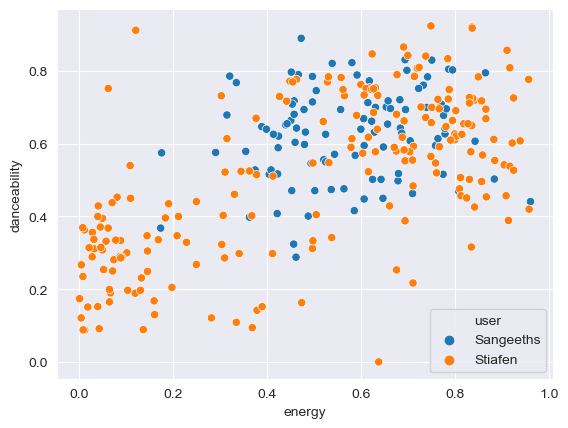

In [10]:
sns.scatterplot(data=completeAudioDataFrameVisualize, x="energy", y="danceability", hue="user")

<AxesSubplot:xlabel='tempo', ylabel='loudness'>

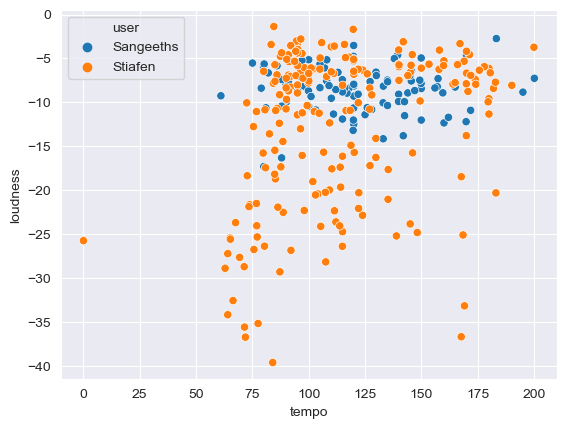

In [12]:
sns.scatterplot(data=completeAudioDataFrameVisualize, x="tempo", y="loudness", hue="user")

<AxesSubplot:xlabel='speechiness', ylabel='acousticness'>

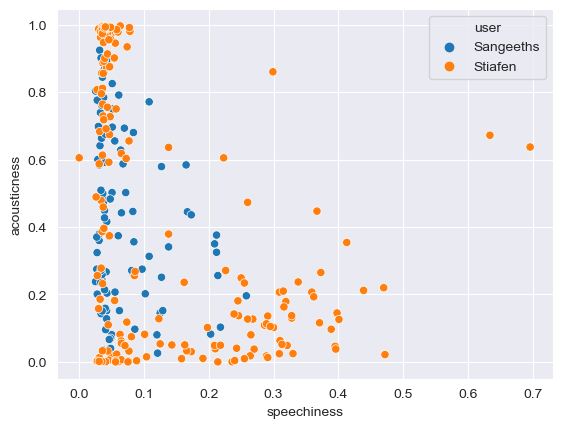

In [14]:
sns.scatterplot(data=completeAudioDataFrameVisualize, x="speechiness", y="acousticness", hue="user")

<AxesSubplot:xlabel='liveness', ylabel='valence'>

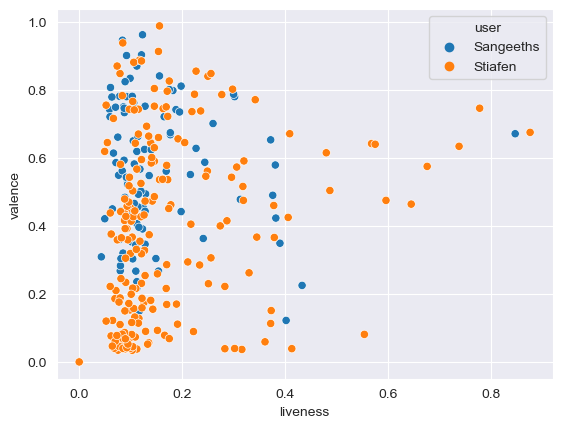

In [15]:
sns.scatterplot(data=completeAudioDataFrameVisualize, x="liveness", y="valence", hue="user")

<AxesSubplot:xlabel='energy', ylabel='loudness'>

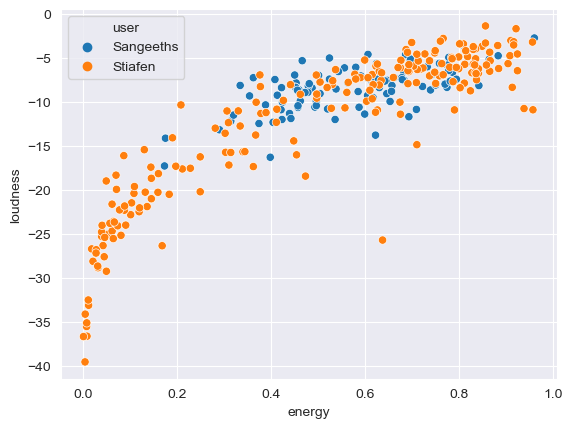

In [16]:
sns.scatterplot(data=completeAudioDataFrameVisualize, x="energy", y="loudness", hue="user")

<AxesSubplot:xlabel='tempo', ylabel='danceability'>

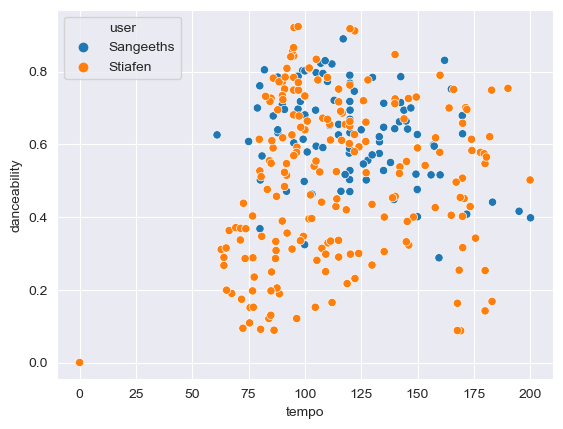

In [17]:
sns.scatterplot(data=completeAudioDataFrameVisualize, x="tempo", y="danceability", hue="user")

<AxesSubplot:xlabel='instrumentalness', ylabel='loudness'>

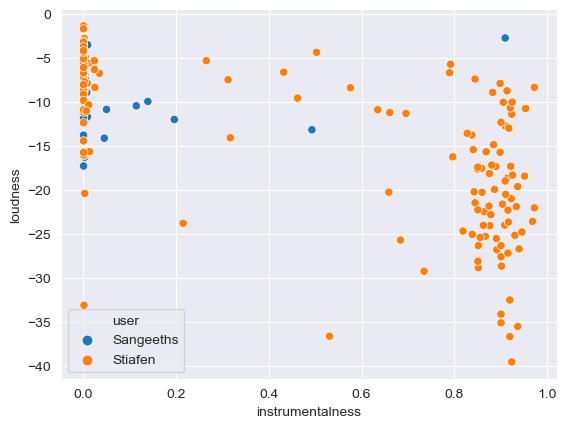

In [29]:
sns.scatterplot(data=completeAudioDataFrameVisualize, x="instrumentalness", y="loudness", hue="user")

<AxesSubplot:xlabel='tempo', ylabel='energy'>

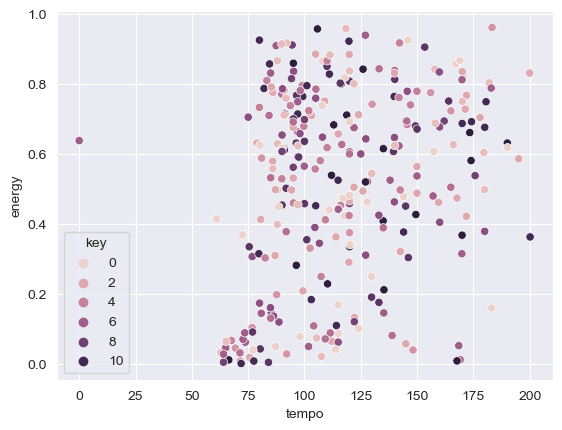